In [1]:
import sys
sys.path.insert(0,'/global/homes/b/bpb/metatlas/')
sys.path.insert(1,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
import multiprocessing as mp

import numpy as np
import os
import pandas as pd
import metatlas.metatlas_objects as metob

from matplotlib import pyplot as plt

import glob
# %matplotlib notebook
%matplotlib notebook

from metatlas.helpers import mzmine_helpers as mzm
from metatlas.helpers import pactolus_tools as pt

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',100)


In [2]:
# peak_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/20160824_C18_LIPID___POS_mzmine_output.csv'
# peak_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/Scoelicolor_media_WT_mzmine_output.csv'
# peak_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/Psim_super_C18_pos_mzmine_output.csv'
# peak_file = '/global/homes/b/bpb/Psim_super_C18_pos_mzmine_output_456peaks.csv'
# Psim_pellet_C18_neg
# hedlund_jad2_and_media

# peak_file = '/project/projectdirs/metatlas/projects/mzmine_parameters/Psim_super_C18_neg_mzmine_output.csv'

# pactolus_results = '/scratch2/scratchdirs/bpb/pactolus_runs/hedlund_jad2_and_media/'
pactolus_results = '/global/cscratch1/sd/bpb/pactolus_runs/rexmalm_pos_super/'
# ctolus_results = '/project/projectdirs/metatlas/projects/pactolus_runs/20170317_SK_Arkin_PseudoAbxCsource/'


# my_polarity = 'negative'

import glob as glob
trees = glob.glob('/global/cscratch1/sd/bpb/level_3_trees/*.h5')

ref_df = pd.read_pickle('/project/projectdirs/openmsi/projects/ben_run_pactolus/unique_compounds.pkl')

output_pickle = '/project/projectdirs/metatlas/projects/mzmine_parameters/rexmalm_pos_super.pkl'
output_csv = '/global/homes/b/bpb/Downloads/rexmalm_pos_super.csv'


In [3]:
pactolus_files = [f for f in glob.glob(pactolus_results+'*.h5') if 'super_' in f.lower()]
pactolus_files

['/global/cscratch1/sd/bpb/pactolus_runs/rexmalm_pos_super/pactolus_results_20170217_C18___POS_MSMS_KBL_RM_Qex139_UV_Psimiae_27_super_PS417_02030_P1C8_P1C8__Run92.h5',
 '/global/cscratch1/sd/bpb/pactolus_runs/rexmalm_pos_super/pactolus_results_20170217_C18___POS_MSMS_KBL_RM_Qex139_UV_Psimiae_122_super_PS_TnSeqPool_kana_P2E3_P2E3__Run386.h5',
 '/global/cscratch1/sd/bpb/pactolus_runs/rexmalm_pos_super/pactolus_results_20170217_C18___POS_MSMS_KBL_RM_Qex139_UV_Psimiae_5_super_PS417_13850_P3B6_P1A6__Run23.h5',
 '/global/cscratch1/sd/bpb/pactolus_runs/rexmalm_pos_super/pactolus_results_20170217_C18___POS_MSMS_KBL_RM_Qex139_UV_Psimiae_34_super_PS417_05300_P1D5_P1D5__Run113.h5',
 '/global/cscratch1/sd/bpb/pactolus_runs/rexmalm_pos_super/pactolus_results_20170217_C18___POS_MSMS_KBL_RM_Qex139_UV_Psimiae_149_super_PS417_19870_P2G10_P2G10__Run470.h5',
 '/global/cscratch1/sd/bpb/pactolus_runs/rexmalm_pos_super/pactolus_results_20170217_C18___POS_MSMS_KBL_RM_Qex139_UV_Psimiae_9_super_PS417_17165_P3B

In [4]:
# pactolus_results = '/global/cscratch1/sd/bpb/pactolus_runs/Cori_20161209_Manuel_SolarPanel'
max_processes = 20
pool = mp.Pool(processes=min(max_processes, len(pactolus_files)))
output = pool.map(pt.read_pacolus_results, pactolus_files)
pool.close()
pool.terminate()
for i,f in enumerate(pactolus_files):
    fname = os.path.basename(f).split('.')[0]
    output[i][0]['filename'] = fname

In [5]:
# important to note that compound==0 is a spectrum with no pactolus hits
msms_df = pd.concat([df[0] for df in output], axis=0)
msms_df.rename(columns={'precursor mz':'precursor_mz','retention time':'retention_time'},inplace=True)
msms_df['compound'] = msms_df['compound'].fillna(0.0).astype(int)
msms_df.reset_index(inplace=True)
msms_df = msms_df.drop(['level_0','index'],1)

In [6]:
msms_df.tail()

,polarity,precursor intensity,precursor_mz,retention_time,filename,score,compound
23642392,1,100987.820312,229.154572,11.356346,pactolus_results_20170217_C18___POS_MSMS_KBL_R...,0.105249,16050
23642393,1,100987.820312,229.154572,11.356346,pactolus_results_20170217_C18___POS_MSMS_KBL_R...,0.103713,16051
23642394,1,100987.820312,229.154572,11.356346,pactolus_results_20170217_C18___POS_MSMS_KBL_R...,0.100639,16093
23642395,1,100987.820312,229.154572,11.356346,pactolus_results_20170217_C18___POS_MSMS_KBL_R...,0.100151,15872
23642396,1,100987.820312,229.154572,11.356346,pactolus_results_20170217_C18___POS_MSMS_KBL_R...,0.100151,15871


In [7]:
compound_df = pd.concat([df[1] for df in output], axis=0)
compound_df.drop_duplicates(inplace=True)

In [8]:
cols_to_use = list(set(ref_df.columns.tolist())  - set(compound_df.columns.tolist()))
cols_to_use.append('inchi_key')

compound_df2 = compound_df.reset_index().merge(ref_df[cols_to_use],on='inchi_key',how='inner').reset_index().set_index('index').drop(['level_0'],1)


In [9]:
compound_df2.head()

,filename,inchi,inchi_key,ms1_mass,permanent_charge,mono_isotopic_molecular_weight,synonyms,neutralized_2d_inchi_key,chebi_url,img_abc_id,neutralized_2d_inchi,lipidmaps_url,source,kegg_url,hmdb_url,wikipedia_url,formula,number_components,iupac_name,pubchem_compound_id,description,metacyc_id,kegg_id,hmdb_id,chebi_id,neutralized_inchi_key,neutralized_inchi,name,num_free_radicals,lipidmaps_id,pubchem_url
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1431,/scratch2/scratchdirs/bpb/level_3_trees/FragTr...,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",VTFWFHCECSOPSX-UHFFFAOYSA-N,133.048741,0,133.048741,(+-)-2-ureidoglycine///2-(carbamoylamino)glyci...,VTFWFHCECSOPSX-UHFFFAOYSA-N,http://www.ebi.ac.uk/chebi/searchId.do?chebiId...,,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",,chebi,,,,C3H7N3O3,1,,439649,Allantoic acid in which one of the aminocarbon...,,,,CHEBI:16282///CHEBI:57714,VTFWFHCECSOPSX-UHFFFAOYSA-N,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",(+-)-2-ureidoglycine,0,,http://pubchem.ncbi.nlm.nih.gov/compound/439649
1432,/scratch2/scratchdirs/bpb/level_3_trees/FragTr...,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",VTFWFHCECSOPSX-SFOWXEAESA-N,133.048741,0,133.048741,(2S)-ureidoglycine///(2S)-(carbamoylamino)glyc...,VTFWFHCECSOPSX-UHFFFAOYSA-N,http://www.ebi.ac.uk/chebi/searchId.do?chebiId...,,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",,chebi///metacyc,http://www.genome.jp/dbget-bin/www_bget?C02091,,,C3H7N3O3,1,,45479615,The (2S)-enantiomer of 2-ureidoglycine.,CPD0-2298,C02091,,CHEBI:59945,VTFWFHCECSOPSX-SFOWXEAESA-N,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",(2S)-ureidoglycine,0,,http://pubchem.ncbi.nlm.nih.gov/compound/45479615
1433,/scratch2/scratchdirs/bpb/level_3_trees/FragTr...,"InChI=1S/C3H7N3O3/c4-2(7)5-1-6-3(8)9/h6H,1H2,(...",HEQOQFYJHRGZCD-UHFFFAOYSA-N,133.048741,0,133.048741,ureidomethylcarbamic acid///N-(Carboxyaminomet...,HEQOQFYJHRGZCD-UHFFFAOYSA-N,http://www.ebi.ac.uk/chebi/searchId.do?chebiId...,,"InChI=1S/C3H7N3O3/c4-2(7)5-1-6-3(8)9/h6H,1H2,(...",,chebi///metacyc,,,,C3H7N3O3,1,,440998,Conjugate base of N-(carboxyaminomethyl)urea.,CPD-14173,,,CHEBI:15569///CHEBI:57415,HEQOQFYJHRGZCD-UHFFFAOYSA-N,"InChI=1S/C3H7N3O3/c4-2(7)5-1-6-3(8)9/h6H,1H2,(...",ureidomethylcarbamic acid,0,,http://pubchem.ncbi.nlm.nih.gov/compound/440998
1434,/scratch2/scratchdirs/bpb/level_3_trees/FragTr...,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",VTFWFHCECSOPSX-PVQJCKRUSA-N,133.048741,0,133.048741,(S)-2-azaniumyl-2-(carbamoylamino)acetate///(S...,VTFWFHCECSOPSX-UHFFFAOYSA-N,http://www.ebi.ac.uk/chebi/searchId.do?chebiId...,,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",,chebi,,,,C3H7N3O3,1,,,The zwitterion resulting from the transfer of ...,,,,CHEBI:59947,VTFWFHCECSOPSX-PVQJCKRUSA-N,"InChI=1S/C3H7N3O3/c4-1(2(7)8)6-3(5)9/h1H,4H2,(...",(S)-2-ureidoglycine zwitterion,0,,
1435,/scratch2/scratchdirs/bpb/level_3_trees/FragTr...,InChI=1S/C8H7NO/c10-8-7-4-2-1-3-6(7)5-9-8/h1-4...,PXZQEOJJUGGUIB-UHFFFAOYSA-N,133.052764,0,133.052764,"isoindolin-1-one///480-91-1///2,3-DIHYDRO-1H-I...",PXZQEOJJUGGUIB-UHFFFAOYSA-N,http://www.ebi.ac.uk/chebi/searchId.do?chebiId...,,InChI=1S/C8H7NO/c10-8-7-4-2-1-3-6(7)5-9-8/h1-4...,,chebi,,,,C8H7NO,1,,10199,A member of the class of isoindoles that is 2...,,,,CHEBI:74235,PXZQEOJJUGGUIB-UHFFFAOYSA-N,InChI=1S/C8H7NO/c10-8-7-4-2-1-3-6(7)5-9-8/h1-4...,isoindolin-1-one,0,,http://pubchem.ncbi.nlm.nih.gov/compound/10199


In [10]:

temp = msms_df.merge(compound_df2,how='left',left_on='compound',right_index=True)


In [11]:
temp[temp.inchi_key == 'FEZACAATIBBDPS-UHFFFAOYSA-N']

,polarity,precursor intensity,precursor_mz,retention_time,filename_x,score,compound,filename_y,inchi,inchi_key,ms1_mass,permanent_charge,mono_isotopic_molecular_weight,synonyms,neutralized_2d_inchi_key,chebi_url,img_abc_id,neutralized_2d_inchi,lipidmaps_url,source,kegg_url,hmdb_url,wikipedia_url,formula,number_components,iupac_name,pubchem_compound_id,description,metacyc_id,kegg_id,hmdb_id,chebi_id,neutralized_inchi_key,neutralized_inchi,name,num_free_radicals,lipidmaps_id,pubchem_url


In [12]:
# temp.to_pickle('/global/homes/b/bpb/Downloads/pseudo5_pactolus.pkl')

### remove peaks that are outside of mz tolerance

In [13]:
temp['detected_polarity'] = temp.polarity.apply(lambda x: 'positive' if x == 1 else 'negative')

In [14]:
def mz_filter(row):
    """
    calculates the ppm offset between measured and theoretical m/z
    """
    
    if row.detected_polarity == 'positive':
        multiplier = 1
    else:
        multiplier = -1
        
    ppm = abs(row.precursor_mz - row.mono_isotopic_molecular_weight - (multiplier * 1.007276))/row.mono_isotopic_molecular_weight*1e6
#     print ppm,row.mz,multiplier
    return ppm
temp['ppm'] = temp.apply(mz_filter,axis=1)

<IPython.core.display.Javascript object>


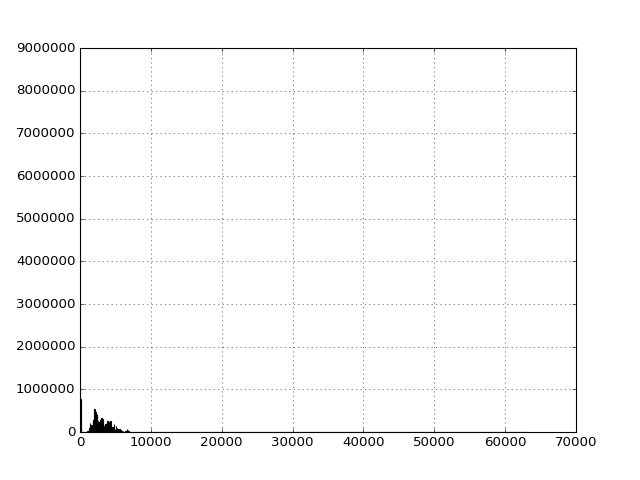

In [15]:
temp.ppm.hist(bins=1000)

In [16]:
temp_filtered = temp[(temp.score > 0.01) & (temp.ppm < 10)]

In [17]:
temp.shape

(23642397, 40)

In [18]:
temp_filtered.shape

(2740043, 40)

In [19]:
len(temp_filtered.inchi_key.unique())

21619

In [20]:
temp_filtered.to_pickle(output_pickle)

In [21]:
temp_filtered.to_csv(output_csv)

In [22]:
# df = pd.read_pickle('/project/projectdirs/metatlas/projects/mzmine_parameters/actinorhodin_dataset.pkl')
# df.to_csv('example.csv')

In [23]:
# temp[temp.synonyms.fillna('').str.contains('prodigiosin')]

In [24]:
# temp_filtered.head(100)

In [25]:
# def take_best_hit(df_in,compound_df,mz_tolerance,mz,polarity):
#     """
#     given a dataframe take the hits and filename and return sorted scores with only the highest score remaining
#     """
    
#     all_hits = [hh + (f,mz,compound_df.loc[hh[1],'ms1_mass'],) for (h,f) in zip(df_in['hits'],df_in['filename']) for hh in h]
#     all_hits = sorted(all_hits)[::-1]
#     if polarity == 'positive':
#         multiplier = 1
#     else:
#         multiplier = -1
        
#     #remove hits that have a ppm difference greater than a threshold
#     all_hits = [h for h in all_hits if abs(h[3] - h[4] - (multiplier * 1.007276))/h[4]*1e6 < mz_tolerance]
      
#     df = pd.DataFrame(all_hits,columns=['score','compound_idx','filename','mz','mass'])
#     df[df['score'] == df.groupby(['compound_idx'])['score'].transform(max)] #take only the highest pactolus score
#     return [tuple(r) for r in df.values]


# peak_df['compound_indices'] = hits #This references the indices in compound_df


### remove peaks that don't have msms in any file

In [26]:
# peak_has_msms = [False if h=='no msms' else True for h in hits]
# peak_df = peak_df[peak_has_msms]

In [27]:
# peak_df.reset_index(inplace=True)

In [28]:
# items_as_cols = df.apply(lambda x: pd.Series(x['samples']), axis=1)
# # Keep original df index as a column so it's retained after melt
# items_as_cols['orig_index'] = items_as_cols.index

# melted_items = pd.melt(items_as_cols, id_vars='orig_index', 
#                        var_name='sample_num', value_name='sample')
# melted_items.set_index('orig_index', inplace=True)

# df.merge(melted_items, left_index=True, right_index=True)


In [29]:
# Number of hits
# Score of best hit
# Avg Score
# Median Score
# Number of hits within 50% of best hit
# List of compound names from top hits (<N)
# Show the full info for the best hit
# export hit tables for each feature

In [30]:
# peak_df['num_pactolus_hits'] = peak_df.compound_indices.apply(lambda x: len(x))
# def pactolus_stats(x):
#     best_score = None
#     worst_score = None
#     avg_score = None
#     median_score = None
#     best_score_file = None
#     best_score_precursor_mz = None
#     best_score_precursor_mass = None
#     best_score_compound_idx = None
#     if x:
#         best_score = x[0][0]
#         worst_score = x[-1][0]
#         avg_score = np.mean([xx[0] for xx in x])
#         median_score = np.median([xx[0] for xx in x])
#         best_score_file = x[0][2]
#         best_score_precursor_mass = x[0][4]
#         best_score_precursor_mz = x[0][3]
#         best_score_compound_idx = int(x[0][1])
        

#     return pd.Series({'best_score':best_score,
#                       'worst_score':worst_score,
#                       'avg_score':avg_score,
#                       'median_score':median_score,
#                       'best_score_file':best_score_file,
#                       'best_score_precursor_mz':best_score_precursor_mz,
#                       'best_score_precursor_mass':best_score_precursor_mass,
#                       'best_score_compound_idx':best_score_compound_idx
#                      })
   
# temp = peak_df.compound_indices.apply(pactolus_stats)
# peak_df[temp.columns] = temp


In [31]:
# peak_df = peak_df.merge(compound_df2, how='inner',left_on='best_score_compound_idx', right_index=True)

In [32]:
# peak_df.head()

In [33]:
# peak_df.drop('compound_indices',1).to_csv('~/Downloads/peak_output.csv')

## Make pactolus table: feature ID, compound info, pactolus score

In [34]:
# # %%time
# N=100
# items_as_cols = peak_df.head(N).apply(lambda x: pd.Series(x['compound_indices']), axis=1)
# # Keep original df index as a column so it's retained after melt
# items_as_cols['orig_index'] = items_as_cols.index

# melted_items = pd.melt(items_as_cols, id_vars='orig_index', var_name='sample_num', value_name='compound_indices')['compound_indices']

# tuple_cols = ['pactolus_score','compound_index','pactolus_file','precursor_mass','precursor_mz']
# temp = pd.DataFrame(melted_items.head(),columns=tuple_cols)

# # melted_items[]
# # temp = melted_items['compound_indices'].apply(pd.Series)
# # melted_items.set_index('orig_index', inplace=True)
# # df2 = df.head(N).merge(melted_items, left_index=True, right_index=True)

In [35]:
# items_as_cols = peak_df.head(N).apply(lambda x: pd.Series(x['compound_indices']), axis=1)
# temp = pd.melt(items_as_cols).value.apply(pd.Series)
# temp.columns = tuple_cols
# temp.head()

In [36]:
# temp = melted_items.to_frame()['compound_indices'].apply(pd.Series)
# temp.columns = tuple_cols
# temp.head()

In [37]:
# temp

In [38]:
# compound_df2.ix[[h[1] for h in peak_df.loc[5,'compound_indices']]]

* Number of hits
* Score of best hit
* Avg Score
* Median Score
* Number of hits within 50% of best hit
* Show the full info for the best hit
* export hit tables for each feature

* delete hit table colum from peak_df


In [39]:
# best_hit_df = pd.DataFrame(columns=compound_df2.columns)
# empty_df = pd.DataFrame(columns=compound_df2.columns)

# for i in range(10):
#     print i
#     idx = peak_df.loc[i,'compound_indices']
# #     if idx:
#     best_hit_df.append(compound_df2.ix[[idx[2]]])#,ignore_index=True,)
# #     else:
# #         best_hit_df.append(empty_df)


In [40]:
# best_hit_df

### long term, export three views to an interactive webpage
* Feature table, when a row is selected:
* populates a pactolus hit table, when a row is selected:
* populates a chem_network table

In [41]:
# # import numpy as np
# # import pandas as pd
# from textwrap import wrap
# HEADER = '''
# <link rel="stylesheet" type="text/css" href="http://cdn.datatables.net/1.10.13/css/jquery.dataTables.css">
# <style>

# </style>
# <script src="http://ajax.googleapis.com/ajax/libs/jquery/1.7.1/jquery.min.js" type="text/javascript"></script>
# <script type="text/javascript" charset="utf8" src="http://cdn.datatables.net/1.10.13/js/jquery.dataTables.js"></script>
# <html>
#     <head>
#         <script >
#             $(document).ready( function () { $('#table_id').DataTable() } );
#         </script>
#     </head>
#     <body>
# '''
# FOOTER = '''
#     </body>
# </html>


# <script type="text/javascript" >
#     $(document).ready( function () {
#     $('#table_id').DataTable();
# } );
# </script>
# '''

# # title = ax.set_title("\n".join(wrap("Some really really long long long title I really really need - and just can't - just can't - make it any - simply any - shorter - at all.", 60)))
# # df.rename(columns=lambda x: x[1:], inplace=True)

# with open('test.html', 'w') as f:
#     f.write(HEADER)
#     f.write(compound_df2.ix[[h[1] for h in peak_df.loc[1,'compound_indices']]].to_html(classes='df').replace('class="dataframe df"','id="table_id" class="hover"').replace('border="1"','td {word-wrap: break-word}'))
# #     f.write(peak_df.rename(columns=lambda x: "\n".join(wrap(x,25))).head(100).to_html(classes='df').replace('class="dataframe df"','id="table_id" class="hover"').replace('border="1"','td {word-wrap: break-word}'))
#     f.write(FOOTER)